<img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" alt="Logo" style="width:500px;"/>
</br>
</br>
<center> 
    <b style="font-size:24pt"> Uso de Grafos </b>
</center>
</br>
<center> 
    <b style="font-size:14pt"> Tarea 9 </b>
</center>

</br>
</br>

<center> 
    TC1031 - Estructuras de Datos y Algoritmos Fundamentales
</center>

<center> 
    Grupo 504
</center>

</br>
</br>
</br>
</br>

<center> 
    Joaquín Badillo Granillo
</center>
<center> 
    A01026364
</center>

</br>
</br>
</br>
</br>
$\newcommand{\bigO}[1]{\mathcal{O}\left(#1\right)}$

<center> 
    <b> Bajo la instrucción de </b>
</center>
<center> 
    Esteban Castillo Juárez
</center>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Implentar el grafo

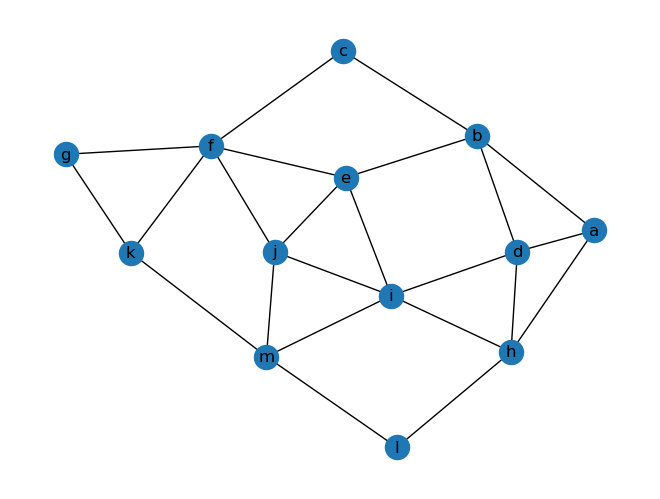

In [2]:
# Declare graph
G = nx.Graph()

# Add letters from 'a' to 'm' as vertices using list comprehension
G.add_nodes_from([chr(i) for i in range(97, 110)])

# Add edges
G.add_edges_from([('a', 'b'), ('a', 'd'), ('a', 'h'),
                  ('b', 'd'), ('b', 'c'), ('b', 'e'),
                  ('c', 'f'), ('d', 'h'), ('d', 'i'),
                  ('e', 'i'), ('e', 'f'), ('e', 'j'),
                  ('f', 'g'), ('f', 'j'), ('f', 'k'),
                  ('g', 'k'), ('h', 'i'), ('h', 'l'),
                  ('i', 'j'), ('i', 'm'), ('j', 'm'),
                  ('k', 'm'), ('l', 'm')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

Sea $n = |V|$ el número de vértices y sea $m = |E|$ el número de aristas, agregar los vértices toma tantas instrucciones como haya vértices y agregar las aristas tantas instrucciones como aristas en el grafo. Por ende crear el grafo tiene una complejidad
$$\bigO{n + m}.$$
Como mostrar el grafo requiere de una impresión por cada vértice y arista, su complejidad es la misma y todo el bloque de código tiene una complejidad lineal en el número de vértices y aristas.

# Número de vértices y aristas

In [3]:
print(f"Number of vertices: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")

Number of vertices: 13
Number of edges: 23


Como `nodes` y `edges` son atributos de `G` y no métodos, estas listas están almacenadas en memoria y obtener su longitud es una operación constante, por ende la complejidad general de ambas operaciones (y consecuentemente de este bloque de código) es constante
$$\bigO{1}.$$

# Densidad y Diametro

In [4]:
print(f"Density: {nx.density(G)}")
print(f"Diameter: {nx.diameter(G)}")

Density: 0.2948717948717949
Diameter: 4


Como el número de nodos y de vértices se puede obtener en tiempo constante, su densidad que se define como 
$$d = \frac{2m}{n(n-1)},$$
se puede calcular en tiempo constante
$$\bigO{1}.$$

Sin embargo, el diámetro según la documentación de `networkx` utiliza un algoritmo `2 sweep` y según la bibligorafía que anexan está es una operación con una complejidad de tiempo
$$\bigO{m}.$$

# Grado

In [5]:
degree = G.degree

print("Vértice\t| Grado")
print("—————————————————")
for value in degree:
    print(f"   {value[0]}", end = "\t| ")
    print(f"  {value[1]}")

Vértice	| Grado
—————————————————
   a	|   3
   b	|   4
   c	|   2
   d	|   4
   e	|   4
   f	|   5
   g	|   2
   h	|   4
   i	|   5
   j	|   4
   k	|   3
   l	|   2
   m	|   4


Dado que `degree` existe como atributo de un grafo, asumo que es una cantidad que se almacena en memoria y que por lo tanto acceder a esta toma tiempo constante. sin embargo, mostrar el grado por cada vértice en el grado require recorrer una lsita de tamaño $n$, por ende su complejidad es
$$\bigO{n}$$

# Bucles

In [6]:
try:
    nx.simple_cycles(G)
except:
    print("Undirected graph cannot have cycles")

Undirected graph cannot have cycles


Como el grafo dado es un grafo no dirigido no puede tener ciclos de longitud 1. No obstante asumiendo que fuera posible buscar sobre un grafo, según la documentación ofrecida por `networkx` la complejidad del algoritmo para encontrar bucles es
$$\bigO{\left(n + m\right)\left(c+1\right)},$$
donde $c$ es el número de caminos.

# Camino de Euler

In [7]:
if nx.has_eulerian_path(G):
    path = list(nx.eulerian_path(G))
    for node in path:
        print(f"{node}", end="\t")
else:
    print("The graph does not have an eulerian path")

The graph does not have an eulerian path


Debido a que la bibliografía de `networkx` no muestra la complejidad que tiene obtener un camino de Euler en su documentación, consideraremos un algoritmo eficiente, [El algoritmo de Hierholzer](https://www.geeksforgeeks.org/hierholzers-algorithm-directed-graph/), el cual demuestra que es posible encontrar un camino euleriano en 
$$\bigO{m}.$$
Como imprimirlo solo toma tantas aristas como haya en el camino y por definición un camino de Euler pasa por todas las aristas una sola vez, la complejidad general de todo este bloque de código es la misma
$$\bigO{m}.$$

# Circuito de Euler

In [8]:
if nx.is_eulerian(G):
    path = list(nx.eulerian_circuit(G))
    for node in path:
        print(f"{node}", end="\t")
else:
    print("The graph does not have an eulerian circuit")

The graph does not have an eulerian circuit


Según se indica en la documentación de `networkx`, la función para obtener un circuito euleriano tiene una complejidad de tiempo lineal, como no se indica en que variable es lineal usaremos la complejidad
$$\bigO{n + m},$$
y como imprimir el camino toma una cantidad de pasos correspondiente al número de aristas en el grafo, la complejidad general del bloque de código es
$$\bigO{m}$$

# Cliques

In [9]:
print(f"Number of cliques: {len(list(nx.enumerate_all_cliques(G)))}")

Number of cliques: 43


Como muestra la documentación de `networkx`, la cantidad de cliques en un grafo puede llegar a ser exponencial en el tamaño del grafo (lo cual se cumple para grafos completos), por ende en el peor escenario (un  grafo completo) debido a que se crea una lista de cliques para obtener su tamaño, la complejidad es
$$\bigO{2^{n}}.$$

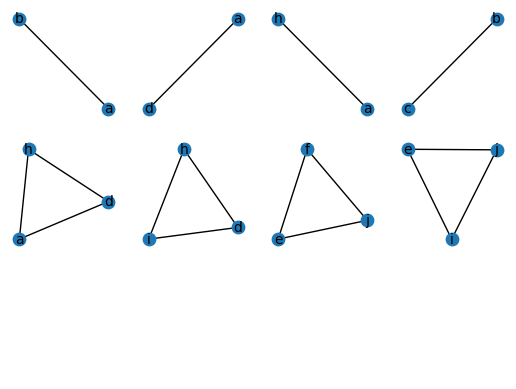

In [10]:
fig, axs = plt.subplots(3, 4)
for row in axs:
    for ax in row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

col = 0
row = 0
size = 2

for nodes in nx.enumerate_all_cliques(G):
    if len(nodes) > 4:
            break
            
    elif len(nodes) > size:
        col = 0
        row += 1
        size += 1

    elif len(nodes) == size and col < 4: 
        nx.draw(G.subgraph(nodes), node_size=80,font_size=10, with_labels=True, ax = axs[row][col]);
        col += 1

Como imprimir los grafos toma un tiempo lineal ($n+ m$) en el tamaño del grafo, considerando que en el peor escenario se tienen $2^{n}$ cliques, imprimirlos tendría una complejidad
$$\bigO{\left(n+m\right)2^{n}}.$$

# Isomorfismos

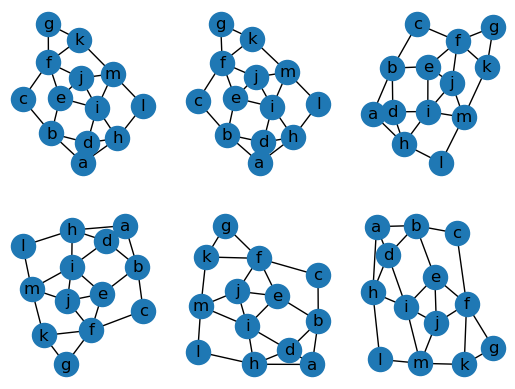

In [11]:
fig, axs = plt.subplots(2, 3)

for i in range(6):
    nx.draw(G, with_labels=True, ax = axs[int(i / 3)][i % 3])

Debido a que un isomorfismo de un grafo se puede obtener imprimiendo los nodos en ubicaciones aleatorias, se puede imprimir un isomorfismo en tiempo lineal
$$\bigO{n + m},$$
si se desean imprimir $k$ isomorfismos la complejidad es
$$\bigO{k\left(n + m\right)}.$$